# Fill Non-Flat Bubbble Template

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
from scipy import ndimage

In [3]:
path = '/home/mpotto/Pesquisa/astroph/data/map_fermi_bubbles.fits'

In [4]:
with fits.open(path) as hdul:
    data = hdul[0].data
    header = hdul[0].header

In [5]:
import astropy as ap

In [6]:
filled_data = ndimage.morphology.binary_fill_holes(data).astype(np.float32)

In [7]:
def generate_fits(data, header, filename):
    hdu = fits.PrimaryHDU(data, header=header)
    hdul = fits.HDUList([hdu])
    hdul.writeto(filename, overwrite=True)

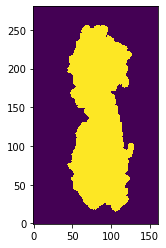

In [8]:
plt.imshow(filled_data, origin='lower')
plt.show()

## Using reproject

In [9]:
data = np.load('/home/mpotto/Downloads/fermi_data/template_bub.npy')

In [10]:
from reproject import reproject_from_healpix
import astropy.wcs as wcs

In [11]:
w = wcs.WCS(naxis=2)
w.wcs.ctype = ['GLON-CAR', 'GLAT-CAR']
w.wcs.crval = np.array([0, 0])
w.wcs.crpix = np.array([300, 550])
w.wcs.cdelt = np.array([0.1, 0.1], dtype=np.float64)
w.wcs.cunit = ['deg', 'deg']

In [12]:
flat_bubbles = reproject_from_healpix((data, 'galactic'), w.to_header(), shape_out=(1100, 600), nested=False)

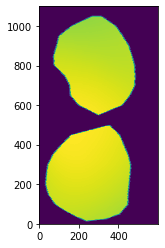

In [13]:
plt.imshow(flat_bubbles[0], origin='lower')
plt.show()

In [14]:
hdu = fits.PrimaryHDU(flat_bubbles[0], header=w.to_header())
hdul = fits.HDUList([hdu])
hdul.writeto('/home/mpotto/Downloads/flat_fermi_bubbles.fits', overwrite=True)